<a href="https://colab.research.google.com/github/Pacoanes/State-of-the-art/blob/master/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
sys.path.append("..")
import download_utils
import tqdm_utils
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [0]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    #gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(image_copy, minSize=(50, 50), scaleFactor=scaleFactor, minNeighbors=10)
    
    if (faces_rect==()):
        return 0
    else:
      
        for (x, y, w, h) in faces_rect:
            #cv2.rectangle(image_copy, (x-20, y-30), (x+w+30, y+h+30), (0, 255, 0), 2)    
            r = max(w, h) / 1.17
            centerx = x + w / 2
            centery = y + h / 2
            nx = int(centerx - r)
            ny = int(centery - r)
            nr = int(r * 2)
    faceimg = image_copy[ny:ny+nr+10, nx:nx+nr+10]

    return faceimg

In [0]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [0]:
drive.mount("/content/drive", force_remount=True)
path = "/content/drive/My Drive/ban/raw1"
training_data = []
for img in os.listdir(path):  
    try:
        img_array = cv2.imread(os.path.join(path,img))  
        faces = detect_faces(haar_cascade_face, img_array)
        img_rgb = cv2.cvtColor(faces, cv2.COLOR_BGR2RGB)
        new_array = cv2.resize(img_rgb, (100, 100))
        training_data.append(new_array)
    except Exception as e:  
        pass
print(len(training_data))

Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


1371


In [0]:
training_dat = np.float32(training_data)/255.

In [0]:
"""        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        new_array = cv2.resize(img_rgb, (36, 36))
        training_data.append(new_array)
    except Exception as e:  # in the interest in keeping the output clean...
        pass
print(len(training_data))
training_dat = np.float32(training_data)/255."""

'        img_array = cv2.imread(os.path.join(path,img))  # convert to array\n        img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)\n        new_array = cv2.resize(img_rgb, (36, 36))\n        training_data.append(new_array)\n    except Exception as e:  # in the interest in keeping the output clean...\n        pass\nprint(len(training_data))\ntraining_dat = np.float32(training_data)/255.'

In [0]:
IMG_SHAPE_ban=training_dat.shape[1:]
IMG_SHAPE_ban

(100, 100, 3)

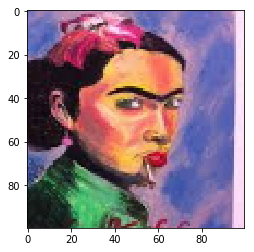

In [0]:
plt.imshow(training_dat[np.random.randint(training_dat.shape[0])], cmap="gray", interpolation="none")

In [0]:
#librerias para GAN
import tensorflow as tf
from keras_utils import reset_tf_session
s = reset_tf_session()
import keras
from keras.models import Sequential
from keras import layers as L

In [0]:
#red generadora
CODE_SIZE = 256

generator = Sequential()
generator.add(L.InputLayer([CODE_SIZE],name='noise'))
generator.add(L.Dense(18*8*8, activation='elu'))
generator.add(L.Reshape((8,8,18)))
generator.add(L.Deconv2D(32,kernel_size=(5,5),activation='elu'))
generator.add(L.Deconv2D(32,kernel_size=(5,5),activation='elu'))
generator.add(L.UpSampling2D(size=(6,6)))
generator.add(L.Deconv2D(16,kernel_size=3,activation='elu'))
generator.add(L.Deconv2D(16,kernel_size=3,activation='elu'))
generator.add(L.Deconv2D(16,kernel_size=2,activation='elu'))
generator.add(L.Conv2D(3,kernel_size=2,activation=None))

generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1152)              296064    
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 18)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 12, 12, 32)        14432     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 16, 16, 32)        25632     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 96, 96, 32)        0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 98, 98, 16)        4624      
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 100, 100, 16)      2320      
__________

In [0]:
discriminator = Sequential()

discriminator.add(L.InputLayer(IMG_SHAPE_ban))

discriminator.add(L.Conv2D(16, kernel_size=3))
discriminator.add(L.BatchNormalization())
discriminator.add(L.advanced_activations.LeakyReLU(alpha=.1))

discriminator.add(L.Conv2D(16, kernel_size=3))
discriminator.add(L.BatchNormalization())
discriminator.add(L.advanced_activations.LeakyReLU(alpha=.1))

discriminator.add(L.MaxPooling2D(pool_size=(2, 2)))

discriminator.add(L.Conv2D(32, kernel_size=3))
discriminator.add(L.BatchNormalization())
discriminator.add(L.advanced_activations.LeakyReLU(alpha=.1))

discriminator.add(L.Conv2D(32, kernel_size=3))
discriminator.add(L.BatchNormalization())
discriminator.add(L.advanced_activations.LeakyReLU(alpha=.1))

discriminator.add(L.MaxPooling2D(pool_size=(2, 2)))


# <build discriminator body>

discriminator.add(L.Flatten())
discriminator.add(L.Dense(128,activation='tanh'))
discriminator.add(L.Dense(2,activation=tf.nn.log_softmax))


discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 98, 16)        64        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 16)        64        
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 96, 96, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
__________

In [0]:
noise = tf.placeholder('float32',[None,CODE_SIZE])
real_data = tf.placeholder('float32',[None,]+list(IMG_SHAPE_ban))

logp_real = discriminator(real_data)

generated_data = generator(noise) #<gen(noise)>

logp_gen = discriminator(generated_data) #<log P(real | gen(noise))




In [0]:
########################
#discriminator training#
########################

d_loss = -tf.reduce_mean(logp_real[:,1] + logp_gen[:,0])

#regularize
d_loss += tf.reduce_mean(discriminator.layers[-1].kernel**2)

#optimize
 
disc_optimizer = tf.train.GradientDescentOptimizer(1e-3).minimize(d_loss,var_list=discriminator.trainable_weights)

In [0]:
########################
###generator training###
########################

g_loss = tf.reduce_mean(logp_gen[:,0]) # <generator loss>

gen_optimizer =tf.train.AdamOptimizer(1e-4).minimize(g_loss,var_list=generator.trainable_weights)
    

In [0]:
s.run(tf.global_variables_initializer())

In [0]:
def sample_noise_batch(bsize):
    return np.random.normal(size=(bsize, CODE_SIZE)).astype('float32')

def sample_data_batch(bsize):
    idxs = np.random.choice(np.arange(training_dat.shape[0]), size=bsize)
    return training_dat[idxs]

def sample_images(nrow,ncol, sharp=False):
    images = generator.predict(sample_noise_batch(bsize=nrow*ncol))
    if np.var(images)!=0:
        images = images.clip(np.min(training_dat),np.max(training_dat))
    for i in range(nrow*ncol):
        plt.subplot(nrow,ncol,i+1)
        if sharp:
            plt.imshow(images[i].reshape(IMG_SHAPE_ban),cmap="gray", interpolation="none")
        else:
            plt.imshow(images[i].reshape(IMG_SHAPE_ban),cmap="gray")
    plt.show()

def sample_probas(bsize):
    plt.title('Generated vs real data')
    plt.hist(np.exp(discriminator.predict(sample_data_batch(bsize)))[:,1],
             label='D(x)', alpha=0.5,range=[0,1])
    plt.hist(np.exp(discriminator.predict(generator.predict(sample_noise_batch(bsize))))[:,1],
             label='D(G(z))',alpha=0.5,range=[0,1])
    plt.legend(loc='best')
    plt.show()

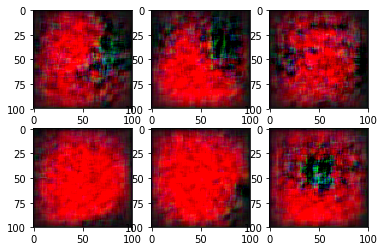

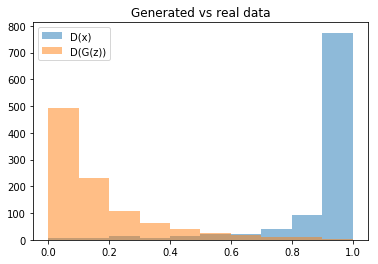



  0%|          | 1/40000 [00:02<30:11:17,  2.72s/it]

  0%|          | 2/40000 [00:03<24:17:31,  2.19s/it]

  0%|          | 3/40000 [00:04<20:07:06,  1.81s/it]

  0%|          | 4/40000 [00:05<17:12:12,  1.55s/it]

  0%|          | 5/40000 [00:06<15:08:29,  1.36s/it]

  0%|          | 6/40000 [00:07<13:41:56,  1.23s/it]

  0%|          | 7/40000 [00:08<12:41:51,  1.14s/it]

  0%|          | 8/40000 [00:09<11:59:14,  1.08s/it]

  0%|          | 9/40000 [00:10<11:30:24,  1.04s/it]

  0%|          | 10/40000 [00:11<11:09:57,  1.01s/it]

  0%|          | 11/40000 [00:12<10:55:53,  1.02it/s]

  0%|          | 12/40000 [00:12<10:45:50,  1.03it/s]

  0%|          | 13/40000 [00:13<10:38:55,  1.04it/s]

  0%|          | 14/40000 [00:14<10:33:24,  1.05it/s]

  0%|          | 15/40000 [00:15<10:29:33,  1.06it/s]

  0%|          | 16/40000 [00:16<10:26:29,  1.06it/s]

  0%|          | 17/40000 [00:17<10:25:00,  1.07it/s]

  0%|          | 18/40000 [00:18<10:24:06,  1.07it/s]

  0%|          | 

KeyboardInterrupt: ignored

In [0]:
from IPython import display
from tqdm import tqdm
for epoch in tqdm(range(40000)):
  
    feed_dict = {
        real_data:sample_data_batch(100),
        noise:sample_noise_batch(100)
    }
  
    for i in range(5):
        s.run(disc_optimizer,feed_dict)
  
    s.run(gen_optimizer,feed_dict)
  
    if epoch %100==0:
        display.clear_output(wait=True)
        sample_images(2,3,True)
        sample_probas(1000)

In [0]:
plt.figure(figsize=[16,24])
sample_images(16,8)